<h3>Imports + Sample Data -- toy dataset (200 rows, 6 features)</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
np.random.seed(42)

n = 200
height_cm = np.random.normal(170, 10, n)
weight_kg = np.random.normal(70, 12, n)

# BMI derived from height & weight to intentionally add correlation
bmi = weight_kg / ((height_cm / 100) ** 2)

income = np.random.lognormal(mean=10, sigma=0.4, size=n)  # skewed
steps_per_day = np.random.normal(6000, 1500, n)
calories = 2000 + 0.3 * steps_per_day + np.random.normal(0, 200, n)  # correlated with steps

df = pd.DataFrame({
    "height_cm": height_cm,
    "weight_kg": weight_kg,
    "bmi": bmi,
    "income": income,
    "steps_per_day": steps_per_day,
    "calories": calories
})

df.head()


,height_cm,weight_kg,bmi,income,steps_per_day,calories
0,174.967142,74.293448,24.268198,11640.305149,7135.482925,4328.301639
1,168.617357,76.729414,26.987169,17330.963715,4616.752014,3281.816658
2,176.476885,82.996615,26.649233,22072.714350,7304.408880,4210.546819
3,185.230299,82.645625,24.087727,22444.306153,8033.456788,4317.581979
4,167.658466,53.467968,19.021410,18397.568928,6620.152355,3899.146461


<h3>Standardize features</h3>

In [2]:
X = df.values  # all numeric columns

#Standard Scaling, each feature value is transformed into its Z-score, which tells you how many standard deviations a value is from the mean of that feature. z= (x−μ)/𝜎
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)


<h3>Fit PCA (keep all components first)</h3>

In [3]:
#This initializes a PCA model. It will calculate all principal components (same number as your original features).
pca = PCA()                 # start with all components

# It does two things at once: Fits the PCA model to your standardized data (X_scaled) — learns directions of maximum variance. Transforms the data into new coordinates (principal components). The result X_pcs is your data projected into a new space (compressed if you drop some PCs later).
X_pcs = pca.fit_transform(X_scaled)

#This gives you a list showing how much variance (information) each principal component captures.
#For example: [0.55, 0.25, 0.12, 0.08] → the first component captures 55% of the total info, second 25%, and so on.
explained_var = pca.explained_variance_ratio_

# This tells you how much total variance is captured as you include more components.
#Example: [0.55, 0.80, 0.92, 1.00] → the first 2 components together capture 80%, and all 4 capture 100%.

#This helps you decide how many components to keep. For example: If the first 2 components explain 95%, you might keep just 2 instead of all — this reduces dimensionality with minimal information loss.
cum_explained_var = explained_var.cumsum()

print("Explained variance ratio per component:\n", explained_var)
print("\nCumulative explained variance:\n", cum_explained_var)


Explained variance ratio per component:
 [0.36725498 0.2778107  0.19020434 0.15296258 0.01086949 0.00089791]

Cumulative explained variance:
 [0.36725498 0.64506568 0.83527002 0.9882326  0.99910209 1.        ]


<h3>Scree plot (+ cumulative variance)</h3>

A Scree plot is a simple but powerful visual used in PCA (Principal Component Analysis) to help you decide how many principal components to keep.

<h4>What is a Scree Plot?</h4>
A Scree plot shows:
<li>On the x-axis: Principal components (PC1, PC2, PC3, etc.)</li>
<li>On the y-axis: The amount of variance explained by each component
(from explained_variance_ratio_ in scikit-learn)</li> <br>

It usually looks like a decreasing curve, because each new component explains less variance than the previous one.

<h4>What is Cumulative Explained Variance?</h4>
Cumulative variance adds up the variance from all PCs as you go:
<li>PC1 = 40%</li>
<li>PC2 = 30%</li>
<li>PC3 = 20%</li>
<li>Cumulative = [40%, 70%, 90%]</li>

This tells you how much total information you're keeping if you include the first k components.



<h4>Why it’s useful:</h4>
<li>Helps you visualize how many components you need to retain most of the data’s information.</li>
<li>You often look for the "elbow point" — where the curve flattens — to decide how many PCs to keep.</li>



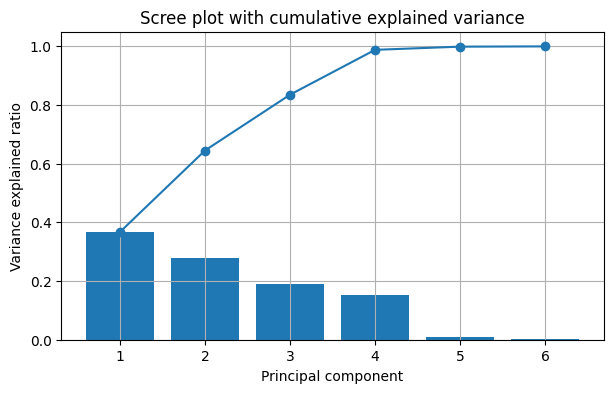

In [4]:
plt.figure(figsize=(7, 4))
plt.bar(range(1, len(explained_var) + 1), explained_var)
plt.plot(range(1, len(cum_explained_var) + 1), cum_explained_var, marker='o')
plt.xlabel("Principal component")
plt.ylabel("Variance explained ratio")
plt.title("Scree plot with cumulative explained variance")
plt.xticks(range(1, len(explained_var) + 1))
plt.grid(True)
plt.show()


<h4>How to read it:</h4>
<li>The bars show how much variance each component explains.</li>
<li>The line shows how variance accumulates as you add components.</li>
<li>Pick the smallest number of components where the cumulative line crosses (say) 90–95%.</li>



<h3>Choose the number of components automatically (e.g., 95% variance)</h3>

In [5]:
pca_95 = PCA(n_components=0.95)
X_pcs_95 = pca_95.fit_transform(X_scaled)

print("Number of components to keep 95% variance:", pca_95.n_components_)
print("Explained variance ratio (kept):", pca_95.explained_variance_ratio_)
print("Cumulative:", pca_95.explained_variance_ratio_.cumsum())


Number of components to keep 95% variance: 4
Explained variance ratio (kept): [0.36725498 0.2778107  0.19020434 0.15296258]
Cumulative: [0.36725498 0.64506568 0.83527002 0.9882326 ]


<h3>2D scatter plot (PC1 vs PC2)</h3>
(Useful for visual pattern checking / clustering intuition.)

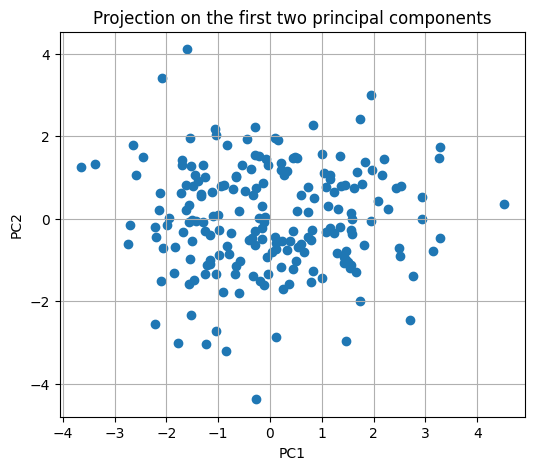

In [6]:
plt.figure(figsize=(6, 5))
plt.scatter(X_pcs[:, 0], X_pcs[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projection on the first two principal components")
plt.grid(True)
plt.show()


If you had labels (e.g., classes), you could color the dots by label to see separation.

<h3>(Optional) 3D scatter (PC1–PC3)</h3>

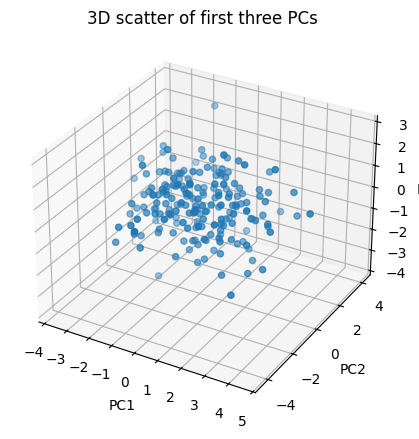

In [7]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (needed for 3D)

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pcs[:, 0], X_pcs[:, 1], X_pcs[:, 2])
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D scatter of first three PCs")
plt.show()


<h3>(Bonus) End-to-end Pipeline</h3>

In [8]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.95))  # keep components explaining 95% variance
])

X_reduced = pipe.fit_transform(df)
pipe.named_steps["pca"].explained_variance_ratio_


array([0.36725498, 0.2778107 , 0.19020434, 0.15296258])

<h3>Key takeaways</h3>
<li>Always standardize before PCA (unless all features are already on the same scale).</li>
<li>Use explained_variance_ratio_ (and its cumulative sum) to decide how many components to keep.</li>
<li>Scree plots and 2D/3D PC scatter plots help you visually judge structure and variance retention.</li>
<li>PCA(n_components=0.95) is a handy way to automatically pick the dimensionality that keeps 95% of variance.</li>

<h3>What happens to your data labels (feature names) after PCA?</h3>
When you apply PCA, your original features (like height, weight, income, etc.) are transformed into new features, which are:<br>

PC1,PC2,PC3,...,PCn
So yes — if you had 5 original features, you’ll get 5 principal components, and the new columns will usually be named:
<li>PC1</li>
<li>PC2</li>
<li>PC3</li>
<li>PC4</li>
<li>PC5</li>

These become the new feature names in your transformed dataset.

<h3>But what are PC1, PC2… really?</h3>
They are linear combinations of your original features. <br>
For example: PC1 = 0.6×height + 0.4×weight − 0.3×income+... <br>
So, they are not copies of your original columns — they’re brand-new axes that summarize the original data in fewer dimensions.

<h3>What about the label column (target)?</h3>
<li>PCA only transforms the input features, not the label (if you're doing supervised learning like classification or regression). </li>
So if your dataset had: <br>
<li>X = [height, weight, income, age, spending]</li>
<li>y = target (like customer churn, disease presence, etc.)</li> </br>

After PCA:
<li>X_transformed = [PC1, PC2, ..., PCn]</li>
<li>y stays unchanged</li>
